In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:
from sklearn.preprocessing import StandardScaler

In [61]:
from sklearn.metrics import roc_auc_score

In [64]:
from sklearn.metrics import roc_curve

In [8]:
df = pd.read_csv('data/heart_disease.csv')

In [9]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [11]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [12]:
df['Heart Disease Status'].value_counts()

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64

In [13]:
df.select_dtypes(include='object').head()

,Gender,Exercise Habits,Smoking,Family Heart Disease,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sugar Consumption,Heart Disease Status
0,Male,High,Yes,Yes,No,Yes,Yes,No,High,Medium,Medium,No
1,Female,High,No,Yes,Yes,No,Yes,No,Medium,High,Medium,No
2,Male,Low,No,No,No,No,Yes,Yes,Low,Low,Low,No
3,Female,High,Yes,Yes,No,Yes,No,Yes,Low,High,High,No
4,Male,Low,Yes,Yes,Yes,Yes,No,No,Low,High,High,No


In [14]:
missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_ratio_%' : ( df.isnull().sum() / len(df)) * 100
}).sort_values(by='missing_ratio_%', ascending=False)

missing_summary

,missing_count,missing_ratio_%
Alcohol Consumption,2586,25.86
Diabetes,30,0.30
Sugar Consumption,30,0.30
Cholesterol Level,30,0.30
Age,29,0.29
Triglyceride Level,26,0.26
CRP Level,26,0.26
High LDL Cholesterol,26,0.26
High Blood Pressure,26,0.26
Low HDL Cholesterol,25,0.25


In [15]:
df = df.drop('Alcohol Consumption', axis = 1)

In [16]:
numeric_cols = df.select_dtypes(include = 'float64').columns

In [17]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [18]:
categorical_cols = df.select_dtypes(include = 'object').columns

In [19]:
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [20]:
df['Heart Disease Status'] = df['Heart Disease Status'].map({'Yes':1, 'No':0})

In [21]:
df['Heart Disease Status'].value_counts()

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64

In [22]:
binary_cols = [
    'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 
]

In [23]:
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

In [24]:
df[binary_cols].head()

,Smoking,Family Heart Disease,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol
0,1,1,0,1,1,0
1,0,1,1,0,1,0
2,0,0,0,0,1,1
3,1,1,0,1,0,1
4,1,1,1,1,0,0


In [25]:
ordinal_map = {'Low':0, 'Medium':1, 'High':2}

In [26]:
ordinal_cols = [
    'Exercise Habits', 'Stress Level', 'Sugar Consumption'
]

In [27]:
for col in ordinal_cols:
    df[col] = df[col].map(ordinal_map)

In [28]:
df[ordinal_cols].head()

,Exercise Habits,Stress Level,Sugar Consumption
0,2,1,1
1,2,2,1
2,0,0,0
3,2,2,2
4,0,2,2


In [29]:
df = pd.get_dummies(df, columns=['Gender'], drop_first = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Blood Pressure        10000 non-null  float64
 2   Cholesterol Level     10000 non-null  float64
 3   Exercise Habits       10000 non-null  int64  
 4   Smoking               10000 non-null  int64  
 5   Family Heart Disease  10000 non-null  int64  
 6   Diabetes              10000 non-null  int64  
 7   BMI                   10000 non-null  float64
 8   High Blood Pressure   10000 non-null  int64  
 9   Low HDL Cholesterol   10000 non-null  int64  
 10  High LDL Cholesterol  10000 non-null  int64  
 11  Stress Level          10000 non-null  int64  
 12  Sleep Hours           10000 non-null  float64
 13  Sugar Consumption     10000 non-null  int64  
 14  Triglyceride Level    10000 non-null  float64
 15  Fasting Blood Sugar 

In [31]:
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [37]:
X = df.drop('Heart Disease Status',axis=1)

In [33]:
y = df['Heart Disease Status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state=42,
    stratify=y
)

In [42]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)

In [44]:
X_test_scaled = scaler.transform(X_test)

In [49]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')

In [50]:
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [53]:
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [54]:
y_pred_04 = (y_prob >= 0.4).astype(int)

In [55]:
y_pred_05 = (y_prob >= 0.5).astype(int)

In [56]:
y_pred_06 = (y_prob >= 0.6).astype(int)

In [58]:
print(classification_report(y_test, y_pred_04))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1600
           1       0.20      1.00      0.33       400

    accuracy                           0.20      2000
   macro avg       0.35      0.50      0.17      2000
weighted avg       0.44      0.20      0.07      2000



In [59]:
print(classification_report(y_test, y_pred_05))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1600
           1       0.18      0.42      0.25       400

    accuracy                           0.51      2000
   macro avg       0.48      0.47      0.44      2000
weighted avg       0.66      0.51      0.56      2000



In [60]:
print(classification_report(y_test, y_pred_06))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [62]:
roc_auc = roc_auc_score(y_test, y_prob)

In [63]:
print('ROC_AUC:', roc_auc)

ROC_AUC: 0.468328125


In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [68]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

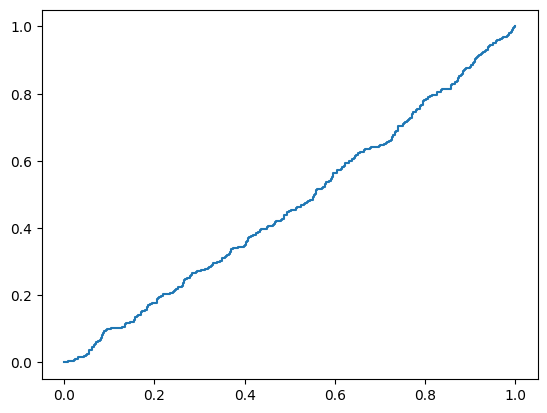

In [69]:
plt.plot(fpr,tpr,label = f"ROC-AUC = {roc_auc:.3f}")